# Solar Profile in Illinois

This notebook calculates an average hourly capacity factor for solar panels in Illinois.

We use a reference solar farm, UIUC Solar Farm 1.0, located in Champaign, IL. The data was provided by the University of Illinois Facilities and Services Department.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size'] = '16'
plt.style.use('ggplot')

colors = {'spring':'tab:green',
          'summer':'tab:red',
          'fall':'tab:orange',
          'winter':'tab:blue'}
# import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['pgf.rcfonts'] = False
# plt.rcParams['figure.edgecolor'] = 'k'
# plt.rcParams['figure.facecolor'] = 'w'
# plt.rcParams['savefig.dpi'] = 400
# plt.rcParams['savefig.bbox'] = 'tight'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"

In [2]:
solarfarm_df = pd.read_csv("../solarfarm_data.csv", parse_dates=True, index_col='time')
solarfarm_df = pd.read_csv("../solarHistories/solarHistories_6_pd.csv", parse_dates=True, index_col='time')
solarfarm_df.rename(columns={'power_data':'kw'}, inplace=True)
solarfarm_df

,kw
time,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2019-12-31 19:00:00,0.0
2019-12-31 20:00:00,0.0
2019-12-31 21:00:00,0.0


In [3]:
hours_grouped = solarfarm_df.groupby(solarfarm_df.index.hour)

In [4]:
avg_hourly = np.zeros(len(hours_grouped))
std_hourly = np.zeros(len(hours_grouped))
for i, hour in enumerate(hours_grouped.groups):
    hour_data = hours_grouped.get_group(hour)
    avg_hourly[i] = hour_data.kw.mean()
    std_hourly[i] = hour_data.kw.std()

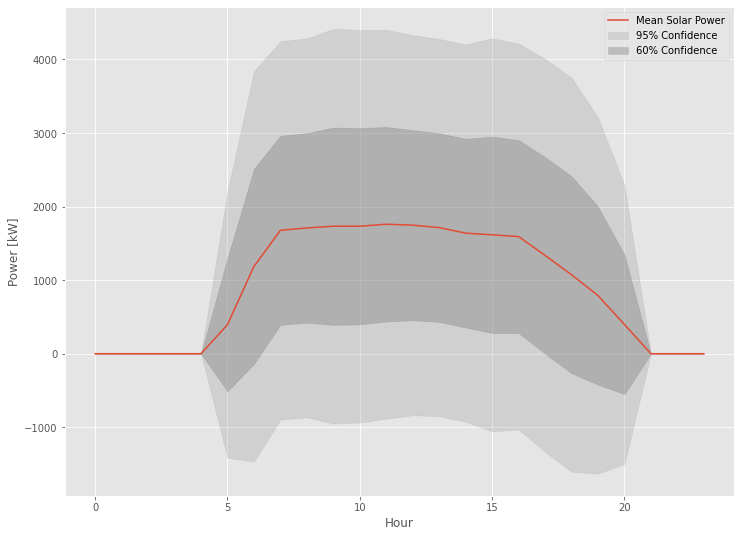

In [5]:
plt.plot(range(24), avg_hourly, label='Mean Solar Power')
plt.fill_between(range(24),
                 avg_hourly + 2 * std_hourly,
                 avg_hourly - 2 * std_hourly,
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(range(24),
                 avg_hourly + std_hourly,
                 avg_hourly - std_hourly,
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Power [kW]')
# plt.savefig("../report/img/cap/solar_mean.png")
plt.show()

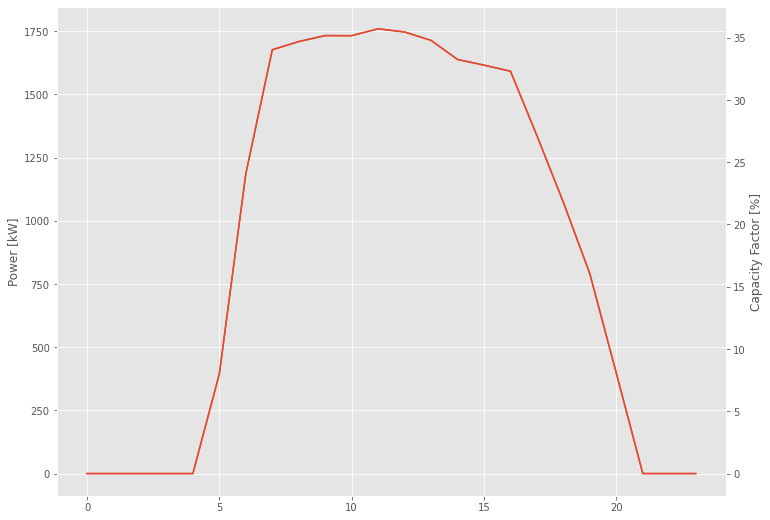

In [6]:
fig, ax = plt.subplots()
fig.figsize=(12,9)
ax.plot(range(24), avg_hourly, label='Mean Solar Power')
ax2 = ax.twinx()
ax2.plot(range(24), avg_hourly/solarfarm_df.kw.max()*100)
plt.xlabel('Hour')
ax.set_ylabel('Power [kW]')
ax2.set_ylabel('Capacity Factor [%]')
plt.grid(which='major')
plt.show()

In [7]:
avg_hourly.mean()/solarfarm_df.kw.max()

0.1868226309918832

In [8]:
for i, v in enumerate(avg_hourly):
    print(f"Hour {i+1} : {v/solarfarm_df.kw.max()} CF")

Hour 1 : 0.0 CF
Hour 2 : 0.0 CF
Hour 3 : 0.0 CF
Hour 4 : 0.0 CF
Hour 5 : 0.0 CF
Hour 6 : 0.08003385660674332 CF
Hour 7 : 0.24071330223981754 CF
Hour 8 : 0.34027627276614625 CF
Hour 9 : 0.3468270917789077 CF
Hour 10 : 0.3516434392598472 CF
Hour 11 : 0.35156406865042256 CF
Hour 12 : 0.35709220096738714 CF
Hour 13 : 0.3545155166396552 CF
Hour 14 : 0.34778287840784766 CF
Hour 15 : 0.332449947122982 CF
Hour 16 : 0.32792354585649447 CF
Hour 17 : 0.3230283032212121 CF
Hour 18 : 0.27124778842546116 CF
Hour 19 : 0.2177559935002786 CF
Hour 20 : 0.16035994129087336 CF
Hour 21 : 0.08052899707112031 CF
Hour 22 : 0.0 CF
Hour 23 : 0.0 CF
Hour 24 : 0.0 CF


In [9]:
spring_mask = (solarfarm_df.index.month >= 3) & (solarfarm_df.index.month <= 5) 
summer_mask = (solarfarm_df.index.month >= 6) & (solarfarm_df.index.month <= 8)
fall_mask = (solarfarm_df.index.month >= 9) & (solarfarm_df.index.month <= 11) 
winter_mask = (solarfarm_df.index.month == 12) | (solarfarm_df.index.month == 1) | (solarfarm_df.index.month == 2) 
seasons = {'spring':spring_mask,
           'summer':summer_mask,
           'fall':fall_mask,
           'winter':winter_mask}
seasonal_hourly_profile = {}

In [10]:
for season in seasons:
    mask = seasons[season]
    df = solarfarm_df[mask]
    hours_grouped = df.groupby(df.index.hour)
    
    avg_hourly = np.zeros(len(hours_grouped))
    std_hourly = np.zeros(len(hours_grouped))
    for i, hour in enumerate(hours_grouped.groups):
        hour_data = hours_grouped.get_group(hour)
        avg_hourly[i] = hour_data.kw.mean()
        std_hourly[i] = hour_data.kw.std()
        
    seasonal_hourly_profile[season] = avg_hourly
    colname = season+"_cf"
    seasonal_hourly_profile[colname] = avg_hourly/solarfarm_df.kw.max()

In [11]:
seasonal_df = pd.DataFrame(seasonal_hourly_profile)
seasonal_df

,spring,spring_cf,summer,summer_cf,fall,fall_cf,winter,winter_cf
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,592.125679,0.120174,972.404561,0.197352,0.000000,0.000000,0.000000,0.000000
6,1546.093675,0.313784,1754.573888,0.356095,1035.198181,0.210096,389.400728,0.079030
7,1583.951405,0.321467,1764.468379,0.358104,1718.786599,0.348832,1638.946733,0.332629
8,1751.019266,0.355374,1696.963395,0.344403,1731.319469,0.351376,1655.402686,0.335968
9,1773.972423,0.360032,1759.101697,0.357014,1809.039083,0.367149,1586.081071,0.321899


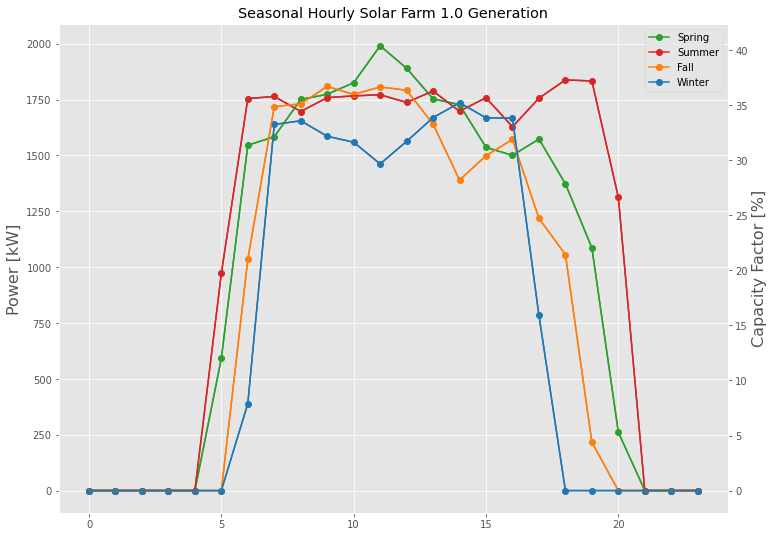

In [12]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.figsize=(12,9)
for season in seasons:
    cf_key = season+"_cf"
    ax.plot(range(24), seasonal_df[season], label=season.capitalize(), color=colors[season], marker='o')
    ax2.plot(range(24), seasonal_df[cf_key]*100, color=colors[season])
plt.xlabel('Hour',fontsize=16)
plt.title("Seasonal Hourly Solar Farm 1.0 Generation")
ax.legend()
ax.set_ylabel('Power [kW]',fontsize=16)
ax2.set_ylabel('Capacity Factor [%]',fontsize=16)
plt.grid(which='major')
plt.show()
# fig.savefig("../report/img/cap/seasonal_hourly_solar.png")

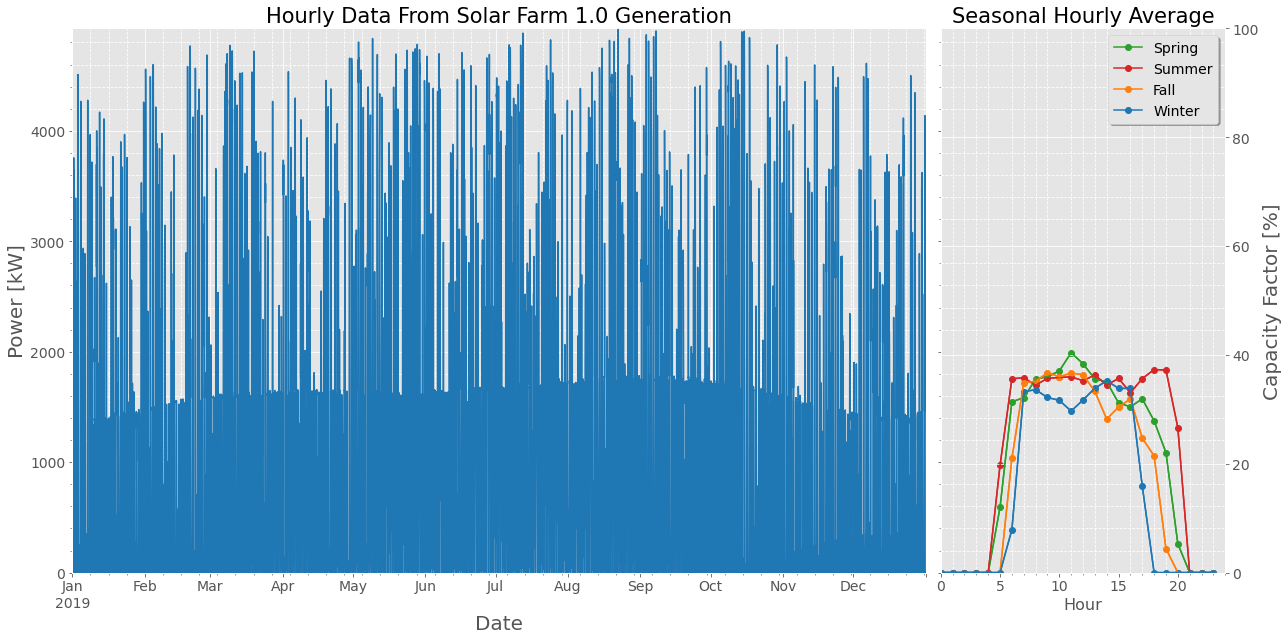

In [13]:
fig, axes = plt.subplots(1,2,figsize=(18,9),gridspec_kw={'width_ratios': [3, 1]}, sharey=True)
ax2 = axes[1].twinx()
# fig.figsize=(12,9)
for season in seasons:
    cf_key = season+"_cf"
    axes[1].plot(range(24), seasonal_df[season], label=season.capitalize(), color=colors[season], marker='o')
    ax2.plot(range(24), seasonal_df[cf_key]*100, color=colors[season])
axes[1].set_xlabel('Hour',fontsize=16)
axes[1].set_title("Seasonal Hourly Average", fontsize=21)
axes[0].set_title("Hourly Data From Solar Farm 1.0 Generation", fontsize=21)
axes[1].legend(fontsize=14, fancybox=True, shadow=True)
axes[0].set_ylabel('Power [kW]',fontsize=20)
ax2.set_ylabel('Capacity Factor [%]',fontsize=20)
axes[1].grid(which='major')
solarfarm_df.kw.plot(ax=axes[0], color='tab:blue', alpha=1)
axes[0].set_xlabel('Date', fontsize=20)
peak = max(solarfarm_df.kw)
axes[0].set_ylim(0,peak)
ax2.set_ylim(0,100)
ax2.set_xlim(0,24)
axes[1].set_ylim(0,peak)
axes[1].set_xlim(0,24)
axes[1].minorticks_on()
axes[0].minorticks_on()
axes[1].grid(which='minor', linestyle='--')
axes[0].grid(which='minor', linestyle='--')
ax2.grid(which='major', linestyle='-', color='w')
axes[0].tick_params(axis='both',labelsize=14)
axes[1].tick_params(axis='both',labelsize=14)
ax2.tick_params(axis='both',labelsize=14)
plt.tight_layout()
# plt.savefig('../../thesis/figures/solar_timeslice.pgf')
plt.show()